In [ ]:
"""
==================================================
DAY 2 LEARNING NOTES: GRADIENT DESCENT
Date: October 20, 2025
==================================================

After watching 3Blue1Brown's "Gradient descent, how neural networks learn"
Here's what I understand:

1. WHAT IS THE COST/LOSS FUNCTION?

It measures how wrong the network’s prediction is. We use it as a reference during backpropagation to know how much each weight should be adjusted.



2. WHAT IS GRADIENT DESCENT?
It’s the process of minimizing the loss function — basically finding the lowest point (least error) step by step.




3. WHAT IS THE GRADIENT?
It represents the direction and steepness of the slope of the loss function. It shows which direction we should move to reduce the error.



4. WHY DO WE "GO DOWNHILL"?
Because a high loss means we’re at a higher point on the slope — moving downhill reduces the loss.



5. WHAT IS THE LEARNING RATE?
It controls the size of each step when adjusting weights.
Too high → unstable learning.
Too low → painfully slow progress.
 

6. HOW DOES THIS CONNECT TO NEURAL NETWORKS?
Neural networks use gradient descent to adjust their weights and minimize loss — that’s how they learn and improve predictions.



7. MY MAIN QUESTION/CONFUSION:
Still trying to visualize how the learning rate influences the updates — like how it determines the right balance between speed and stability.

==================================================
"""

GRADIENT DESCENT VISUALIZATION
Finding the minimum of f(x) = x²

EXPERIMENT 1: Good Learning Rate

Starting gradient descent...
Starting position: x = 10.0000, f(x) = 100.0000
Learning rate: 0.1
Target: Find x where f(x) is minimum (we know it's x=0)

Step   0: x =   8.0000, f(x) =  64.0000, gradient =  20.0000
Step   1: x =   6.4000, f(x) =  40.9600, gradient =  16.0000
Step   2: x =   5.1200, f(x) =  26.2144, gradient =  12.8000
Step   3: x =   4.0960, f(x) =  16.7772, gradient =  10.2400
Step   4: x =   3.2768, f(x) =  10.7374, gradient =   8.1920
Step  10: x =   0.8590, f(x) =   0.7379, gradient =   2.1475
Step  20: x =   0.0922, f(x) =   0.0085, gradient =   0.2306
Step  30: x =   0.0099, f(x) =   0.0001, gradient =   0.0248
Step  40: x =   0.0011, f(x) =   0.0000, gradient =   0.0027

Final result after 50 steps:
x = 0.000143
f(x) = 0.000000
Gradient at final point: 0.000285
✅ SUCCESS! We found the minimum (x ≈ 0)


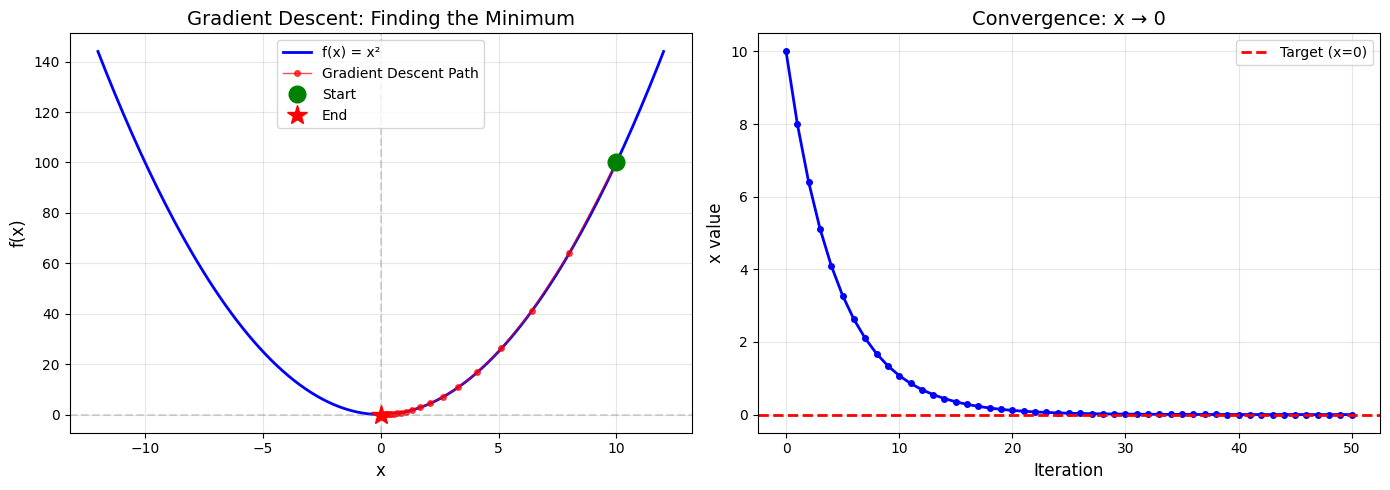


THIS IS HOW NEURAL NETWORKS LEARN!

In a neural network:
• f(x) = Loss function (how wrong predictions are)
• x = Network weights
• Gradient descent finds weights that minimize loss
• This is EXACTLY what's happening inside PyTorch!


In [1]:
# ============================================================
# DAY 2: IMPLEMENTING GRADIENT DESCENT FROM SCRATCH
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

print("=" * 60)
print("GRADIENT DESCENT VISUALIZATION")
print("Finding the minimum of f(x) = x²")
print("=" * 60)

# ============================================================
# PART 1: Define our function and its derivative
# ============================================================

def f(x):
    """
    Our function: f(x) = x²
    This is a simple parabola (U-shape)
    The minimum is at x = 0, where f(0) = 0
    """
    return x ** 2

def df(x):
    """
    Derivative: f'(x) = 2x
    This tells us the slope (gradient) at any point x
    
    If x = 5: gradient = 10 (steep positive slope, go LEFT)
    If x = -5: gradient = -10 (steep negative slope, go RIGHT)
    If x = 0: gradient = 0 (flat, we're at the minimum!)
    """
    return 2 * x

# ============================================================
# PART 2: Gradient Descent Algorithm
# ============================================================

def gradient_descent(start_x, learning_rate, num_iterations):
    """
    Find the minimum of f(x) using gradient descent
    
    Parameters:
    - start_x: Where we begin (our initial guess)
    - learning_rate: How big our steps are
    - num_iterations: How many steps to take
    
    Returns:
    - final_x: Where we ended up
    - history: All positions we visited along the way
    """
    
    x = start_x  # Start at initial position
    history = [x]  # Track our journey
    
    print(f"\nStarting gradient descent...")
    print(f"Starting position: x = {x:.4f}, f(x) = {f(x):.4f}")
    print(f"Learning rate: {learning_rate}")
    print(f"Target: Find x where f(x) is minimum (we know it's x=0)\n")
    
    for i in range(num_iterations):
        # Step 1: Calculate gradient (slope) at current position
        gradient = df(x)
        
        # Step 2: Move in OPPOSITE direction of gradient (downhill)
        # new_x = old_x - (learning_rate × gradient)
        x = x - learning_rate * gradient
        
        # Step 3: Save this position
        history.append(x)
        
        # Print progress every 10 steps
        if i % 10 == 0 or i < 5:
            print(f"Step {i:3d}: x = {x:8.4f}, f(x) = {f(x):8.4f}, gradient = {gradient:8.4f}")
    
    print(f"\nFinal result after {num_iterations} steps:")
    print(f"x = {x:.6f}")
    print(f"f(x) = {f(x):.6f}")
    print(f"Gradient at final point: {df(x):.6f}")
    
    if abs(x) < 0.01:
        print("✅ SUCCESS! We found the minimum (x ≈ 0)")
    else:
        print("⚠️  Not quite there yet. Need more iterations or better learning rate.")
    
    return x, history

# ============================================================
# PART 3: Run gradient descent
# ============================================================

print("\n" + "=" * 60)
print("EXPERIMENT 1: Good Learning Rate")
print("=" * 60)

final_x, history = gradient_descent(
    start_x=10.0,        # Start far from minimum
    learning_rate=0.1,   # Good learning rate
    num_iterations=50    # 50 steps
)

# ============================================================
# PART 4: Visualize the descent
# ============================================================

plt.figure(figsize=(14, 5))

# Plot 1: The function and our path down it
plt.subplot(1, 2, 1)
x_range = np.linspace(-12, 12, 200)
y_range = f(x_range)
plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = x²')
plt.plot(history, [f(x) for x in history], 'ro-', markersize=4, 
         linewidth=1, label='Gradient Descent Path', alpha=0.7)
plt.plot(history[0], f(history[0]), 'go', markersize=12, label='Start', zorder=5)
plt.plot(history[-1], f(history[-1]), 'r*', markersize=15, label='End', zorder=5)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Gradient Descent: Finding the Minimum', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: How x converges to 0 over time
plt.subplot(1, 2, 2)
plt.plot(history, 'bo-', linewidth=2, markersize=4)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Target (x=0)')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('x value', fontsize=12)
plt.title('Convergence: x → 0', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("THIS IS HOW NEURAL NETWORKS LEARN!")
print("=" * 60)
print("\nIn a neural network:")
print("• f(x) = Loss function (how wrong predictions are)")
print("• x = Network weights")
print("• Gradient descent finds weights that minimize loss")
print("• This is EXACTLY what's happening inside PyTorch!")
print("=" * 60)

EXPERIMENT: How Learning Rate Affects Gradient Descent

Testing Learning Rate = 0.01

Starting gradient descent...
Starting position: x = 10.0000, f(x) = 100.0000
Learning rate: 0.01
Target: Find x where f(x) is minimum (we know it's x=0)

Step   0: x =   9.8000, f(x) =  96.0400, gradient =  20.0000
Step   1: x =   9.6040, f(x) =  92.2368, gradient =  19.6000
Step   2: x =   9.4119, f(x) =  88.5842, gradient =  19.2080
Step   3: x =   9.2237, f(x) =  85.0763, gradient =  18.8238
Step   4: x =   9.0392, f(x) =  81.7073, gradient =  18.4474
Step  10: x =   8.0073, f(x) =  64.1171, gradient =  16.3415
Step  20: x =   6.5426, f(x) =  42.8051, gradient =  13.3522

Final result after 30 steps:
x = 5.454843
f(x) = 29.755314
Gradient at final point: 10.909686
⚠️  Not quite there yet. Need more iterations or better learning rate.

Testing Learning Rate = 0.1

Starting gradient descent...
Starting position: x = 10.0000, f(x) = 100.0000
Learning rate: 0.1
Target: Find x where f(x) is minimum (we 

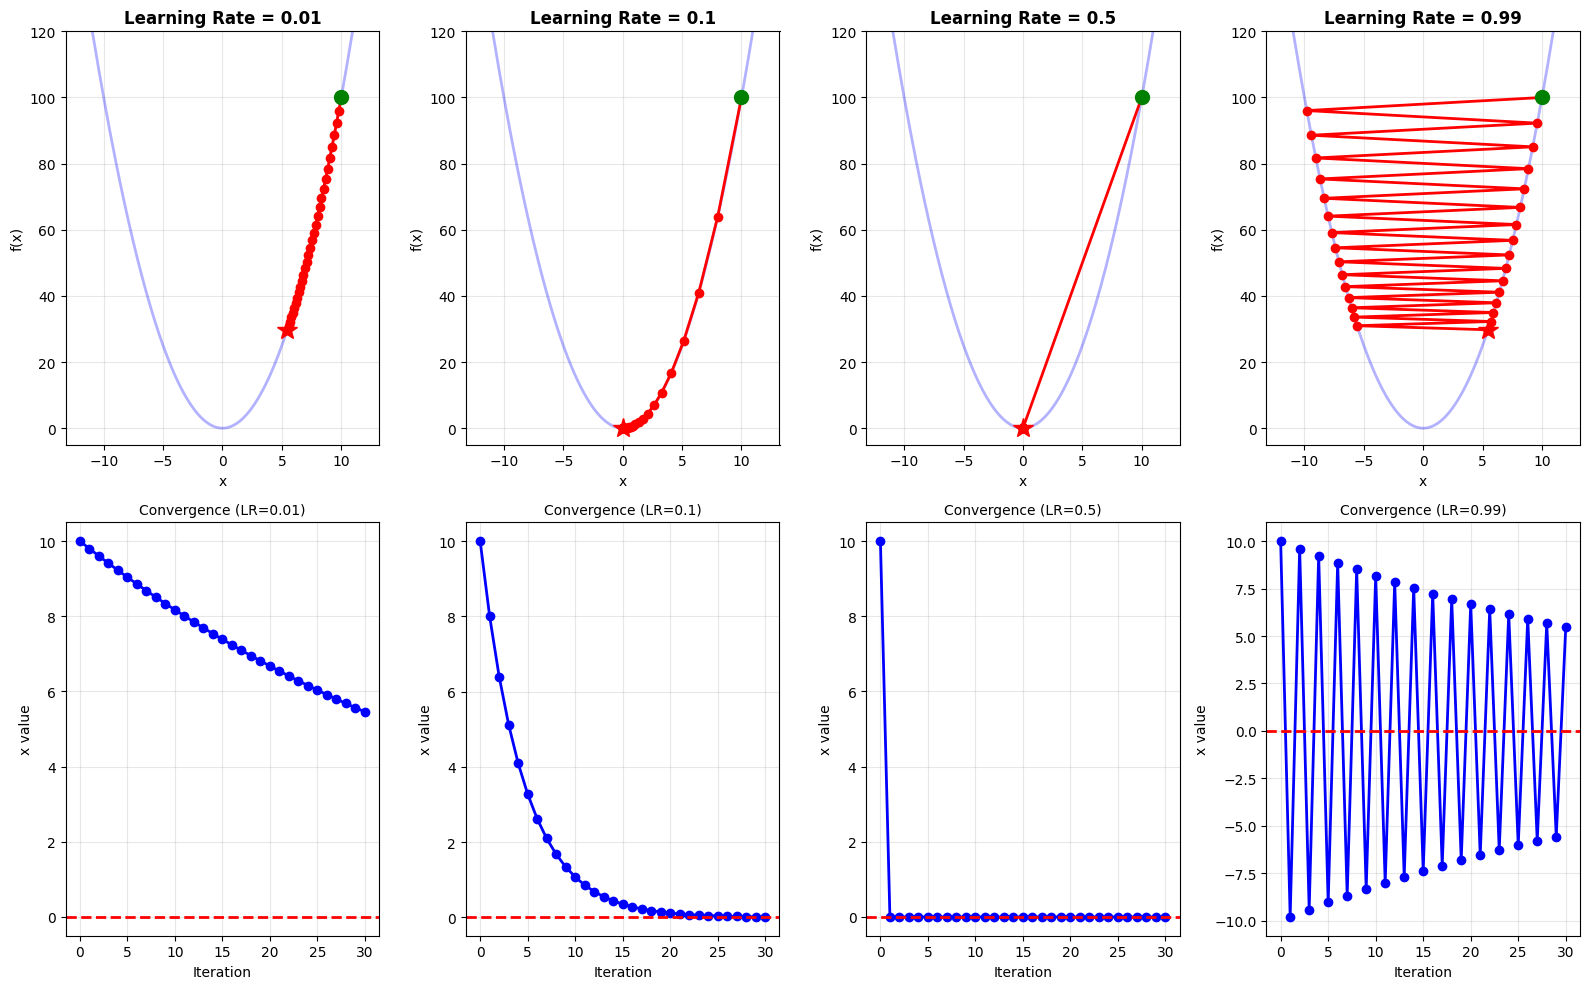


OBSERVATIONS:

LR = 0.01 (TOO SMALL):
  → Very slow progress
  → Takes many steps to reach minimum
  → Safe but inefficient

LR = 0.1 (JUST RIGHT):
  → Steady, efficient progress
  → Reaches minimum quickly
  → This is the sweet spot!

LR = 0.5 (BIG):
  → Fast but can be unstable
  → Still converges but less smooth
  → Starting to oscillate

LR = 0.99 (TOO BIG):
  → Overshoots wildly!
  → Bounces around, unstable
  → Might never converge properly


THIS IS WHY CHOOSING LEARNING RATE IS IMPORTANT!
Too small = slow learning
Too big = unstable/diverging
Just right = efficient learning


In [3]:
# ============================================================
# EXPERIMENT: COMPARING DIFFERENT LEARNING RATES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

print("=" * 70)
print("EXPERIMENT: How Learning Rate Affects Gradient Descent")
print("=" * 70)

# We'll test 4 different learning rates
learning_rates = [0.01, 0.1, 0.5, 0.99]

plt.figure(figsize=(16, 10))

for i, lr in enumerate(learning_rates, 1):
    print(f"\n{'='*70}")
    print(f"Testing Learning Rate = {lr}")
    print('='*70)
    
    # Run gradient descent with this learning rate
    final_x, history = gradient_descent(
        start_x=10.0,
        learning_rate=lr,
        num_iterations=30
    )
    
    # Plot the results
    plt.subplot(2, 4, i)
    x_range = np.linspace(-12, 12, 200)
    y_range = f(x_range)
    plt.plot(x_range, y_range, 'b-', linewidth=2, alpha=0.3)
    plt.plot(history, [f(x) for x in history], 'ro-', markersize=6, linewidth=2)
    plt.plot(history[0], f(history[0]), 'go', markersize=10)
    plt.plot(history[-1], f(history[-1]), 'r*', markersize=15)
    plt.title(f'Learning Rate = {lr}', fontsize=12, fontweight='bold')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, alpha=0.3)
    plt.ylim(-5, 120)
    
    # Plot convergence
    plt.subplot(2, 4, i+4)
    plt.plot(history, 'bo-', linewidth=2, markersize=6)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.title(f'Convergence (LR={lr})', fontsize=10)
    plt.xlabel('Iteration')
    plt.ylabel('x value')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("OBSERVATIONS:")
print("=" * 70)
print("""
LR = 0.01 (TOO SMALL):
  → Very slow progress
  → Takes many steps to reach minimum
  → Safe but inefficient

LR = 0.1 (JUST RIGHT):
  → Steady, efficient progress
  → Reaches minimum quickly
  → This is the sweet spot!

LR = 0.5 (BIG):
  → Fast but can be unstable
  → Still converges but less smooth
  → Starting to oscillate

LR = 0.99 (TOO BIG):
  → Overshoots wildly!
  → Bounces around, unstable
  → Might never converge properly
""")
print("=" * 70)
print("\nTHIS IS WHY CHOOSING LEARNING RATE IS IMPORTANT!")
print("Too small = slow learning")
print("Too big = unstable/diverging")
print("Just right = efficient learning")
print("=" * 70)

In [ ]:
"""
============================================================
DAY 2 REFLECTION: What I Learned Today
============================================================

After coding and visualizing gradient descent, here's what I now understand:

1. HOW DOES GRADIENT DESCENT ACTUALLY WORK?
Gradient descent updates weights step by step, moving toward the lowest point of the loss curve — like a ball rolling downhill.


2. WHAT DID THE VISUALIZATIONS SHOW ME?
Each step reduced the loss. Large learning rates bounced around; smaller ones smoothly converged.


3. NOW I UNDERSTAND LEARNING RATE:
Too high → overshoots or diverges.
Too low → painfully slow.
Right balance → steady and efficient descent.

4. HOW THIS CONNECTS TO NEURAL NETWORKS:
Neural networks apply this process to all weights during training to minimize loss and improve predictions.


5. MY BIGGEST "AHA!" MOMENT TODAY:
It’s not guessing — the gradient tells it exactly where to move.


6. WHAT I'M STILL UNCLEAR ABOUT (if anything):
How gradient descent efficiently scales with millions of parameters.

============================================================
PROGRESS: Day 2 of 168 complete ✅
Next: Day 3 - Backpropagation (how gradients are calculated)
============================================================
"""